In [1]:
import mat4py
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
from tqdm import tqdm
import json

In [3]:
def trans_xywh2xyxy(xywh):
    x,y,w,h = xywh
    return (x,y,x+w,y+h)

In [4]:
def is_passing(loc,threshod_ca=60):
    if loc[-2] > threshod_ca or loc[-1] > threshod_ca:
        return True
    else:
        return False

In [5]:
img_path = "F:\BaiduNetdiskDownload\G2APS\G2APS.zip\G2APS\Image\SSM"

In [6]:
save_path = r"E:\Share\jupyterDir\UAV-GA-TBPR\G2APS-AG"

In [7]:
train_data = mat4py.loadmat(r"F:\BaiduNetdiskDownload\G2APS\G2APS.zip\G2APS\annotation\test\train_test\Train.mat")

In [8]:
test_data = mat4py.loadmat(r"F:\BaiduNetdiskDownload\G2APS\G2APS.zip\G2APS\annotation\test\train_test\TestG50.mat")

In [9]:
train_data['Train'][0]

[{'idname': '70',
  'nAppear': 37,
  'scene': {'imname': ['S1_20_000000.jpg',
    'S1_20_000007.jpg',
    'S1_20_000014.jpg',
    'S1_20_000021.jpg',
    'S1_20_000028.jpg',
    'S1_20_000035.jpg',
    'S1_20_000042.jpg',
    'S1_20_000049.jpg',
    'S1_20_000056.jpg',
    'S1_20_000077.jpg',
    'S1_20_000084.jpg',
    'S1_20_000091.jpg',
    'S1_20_000098.jpg',
    'S1_20_000105.jpg',
    'S1_20_000112.jpg',
    'S1_20_000119.jpg',
    'S1_20_000126.jpg',
    'S1_20_000133.jpg',
    'S1_20_000140.jpg',
    'D1_20_000840.jpg',
    'D1_20_000855.jpg',
    'D1_20_000870.jpg',
    'D1_20_000885.jpg',
    'D1_20_000900.jpg',
    'D1_20_000915.jpg',
    'D1_20_000930.jpg',
    'D1_20_000945.jpg',
    'D1_20_000960.jpg',
    'D1_20_000975.jpg',
    'D1_20_000990.jpg',
    'D1_20_001005.jpg',
    'D1_20_001020.jpg',
    'D1_20_001035.jpg',
    'D1_20_001050.jpg',
    'D1_20_001065.jpg',
    'D1_20_001080.jpg',
    'D1_20_001095.jpg'],
   'idlocate': [[155, 217, 13, 37],
    [151, 221, 15, 34

In [30]:
number = 0
for item in train_data['Train']:
    uav_len = sum(item[0]['scene']['isuav'])
    
    uav_loc = item[0]['scene']['idlocate'][-uav_len:]
    gt_loc = item[0]['scene']['idlocate'][:uav_len+1]
    
    sum_uav = sum([is_passing(i,threshod_ca=50) for i in uav_loc])
    sum_gt = sum([is_passing(i,threshod_ca=40) for i in gt_loc])
    
    min_t = min(sum_uav,sum_gt)
    
    for name,loc in zip(item[0]['scene']['name'][-uav_len:],uav_loc):
        pass
    
    for name,loc in zip(item[0]['scene']['name'][:uav_len+1],gt_loc):
        pass
    
    #number += min(sum_uav,sum_gt)*2
    #break

In [31]:
number

46372

In [41]:
sum_uav = sum([is_passing(i) for i in gt_loc])

In [42]:
sum_uav

7

In [10]:
len(test_data['TestG50']['Query'])

566

In [11]:
test_data['TestG50']['Query'][0]

{'imname': 'S7_20_000259.jpg',
 'idlocate': [356, 460, 46, 122],
 'isuav': 0,
 'idname': '2950'}

In [12]:
test_data['TestG50']['Gallery'][-100]

{'imname': ['D9_30_002085.jpg',
  'D9_30_002070.jpg',
  'D9_30_002325.jpg',
  'D9_30_002250.jpg',
  'D9_30_001755.jpg',
  'D9_30_002310.jpg',
  'D9_30_001980.jpg',
  'D9_30_001875.jpg',
  'D9_30_002340.jpg',
  'D9_30_001950.jpg',
  'D8_20_009375.jpg',
  'D7_40_004650.jpg',
  'D7_30_005385.jpg',
  'D8_30_005370.jpg',
  'D9_20_003495.jpg',
  'D8_30_008460.jpg',
  'D8_20_010575.jpg',
  'D8_40_004110.jpg',
  'D8_30_010725.jpg',
  'D7_20_003435.jpg',
  'D7_50_000540.jpg',
  'D8_40_006705.jpg',
  'D9_50_001410.jpg',
  'D8_40_004785.jpg',
  'D9_30_001995.jpg',
  'D8_40_001005.jpg',
  'D8_40_000165.jpg',
  'D9_20_003450.jpg',
  'D9_30_000900.jpg',
  'D7_40_005640.jpg',
  'D8_20_008430.jpg',
  'D7_30_006750.jpg',
  'D8_50_003690.jpg',
  'D8_20_008640.jpg',
  'D7_20_002685.jpg',
  'D8_30_005085.jpg',
  'D8_20_007080.jpg',
  'D7_40_002970.jpg',
  'D8_30_007080.jpg',
  'D8_50_002670.jpg',
  'D9_50_000405.jpg',
  'D7_50_001605.jpg',
  'D8_20_001935.jpg',
  'D9_30_002490.jpg',
  'D7_20_006165.jpg',


In [13]:
train_data['Train'][0][0]['scene']['imname'][0]

'S1_20_000000.jpg'

In [16]:
# 统计训练数据的图像

threshod_ca = 60
threshod_uav = 60
total = 0
img_sum = 0
img_total = 0
for i in range(len(train_data['Train'])):
    flag_camera=False
    flag_uav=False
    data_item = train_data['Train'][i][0]
    for loc,isuav in zip(data_item['scene']['idlocate'],data_item['scene']['isuav']):
        img_total += 1
        if loc[-2] > threshod_ca or loc[-1] > threshod_ca:
            img_sum += 1
            if isuav==0:
                flag_camera = True
            else:
                flag_uav = True
    if flag_camera and flag_uav:
        total += 1


print("not small crop frac={:.2f}%".format(total/len(train_data['Train'])*100))

print("not small crop image frac={:.2f}%".format(img_sum/img_total*100))

not small crop frac=31.86%
not small crop image frac=37.56%


In [17]:
img_sum

50903

In [18]:
# 处理训练数据的图像

train_data_info = []

img_sum = 0

for i in tqdm(range(len(train_data['Train']))):
    data_item = train_data['Train'][i][0]
    tmp_size = 1
#     for j in range(len(data_item['scene']['imname'])):
#         loc = data_item['scene']['idlocate'][j]
#         if is_passing(loc) and data_item['scene']['isuav'][j]:
#             tmp_size += 1
    for j in range(len(data_item['scene']['imname'])):
        loc = data_item['scene']['idlocate'][j]
        if is_passing(loc):
#             if data_item['scene']['isuav'][j] == 0 and tmp_size > 0:
#                 tmp_size -= 1
#             elif data_item['scene']['isuav'][j] == 1:
#                 pass
#             else:
#                 continue
                
            img_sum += 1
            person_id = data_item['idname']
            img = Image.open(os.path.join(img_path,data_item['scene']['imname'][j]))
            img_p = img.crop(trans_xywh2xyxy(loc))
            img_id = img_sum
            img_name = data_item['scene']['imname'][j][:-4]+"_"+str(j).zfill(5)+".jpg"
            img_p.save(os.path.join(save_path,"img",img_name))
            img_type = data_item['scene']['isuav'][j]
            train_data_info.append([person_id,img_id,img_name,img_type])
        

100%|██████████████████████████████████████████████████████████████████████████████| 2078/2078 [14:18<00:00,  2.42it/s]


In [19]:
len(train_data_info)

50903

In [20]:
with open(os.path.join(save_path,"train.json"), 'w') as  f:
    json.dump(train_data_info, f)

In [41]:
# Stat Test Gallery frac
img_sum = 0

threshod_ca = 60
threshod_uav = 60

eva_data_info = []

for i in tqdm(range(len(test_data['TestG50']['Query']))):
    data_item_q = test_data['TestG50']['Query'][i]
    loc = data_item_q['idlocate']
    tmp_id = 0
    if loc[-2] > threshod_ca or loc[-1] > threshod_ca:
        img_sum += 1
        tmp_id += 1
        img = Image.open(os.path.join(img_path,data_item_q['imname'])).crop(trans_xywh2xyxy(loc))
        img_name = data_item_q['imname'][:-4]+"_"+str(tmp_id).zfill(5)+".jpg"
        img.save(os.path.join(save_path,"img",img_name))
        eva_data_info.append([int(data_item_q['idname']),img_sum,img_name,data_item_q['isuav']])
        
    data_item_g = test_data['TestG50']['Gallery'][i]
    
    for j in range(len(data_item_g['imname'])):
        loc = data_item_g['idlocate'][j]
        if len(loc) > 0 and (loc[-2] > threshod_ca or loc[-1] > threshod_ca):
            img_sum += 1
            tmp_id += 1
            img = Image.open(os.path.join(img_path,data_item_g['imname'][j])).crop(trans_xywh2xyxy(loc))
            img_name = data_item_g['imname'][j][:-4]+"_"+str(tmp_id).zfill(5)+".jpg"
            img.save(os.path.join(save_path,"img",img_name))
            eva_data_info.append([int(data_item_q['idname']),img_sum,img_name,data_item_g['isuav'][j]])
        
#             person_id = data_item['idname']
            
#             img = Image.open(os.path.join(img_path,data_item['scene']['imname'][j]))
            
#             img_p = img.crop(trans_xywh2xyxy(loc))
            
#             img_id = img_sum
#             img_name = data_item['scene']['imname'][j][:-4]+"_"+str(j).zfill(5)+".jpg"
#             img_p.save(os.path.join(save_path,"img",img_name))
#             img_type = data_item['scene']['isuav'][j]
#             train_data_info.append([person_id,img_id,img_name,img_type])
      

100%|████████████████████████████████████████████████████████████████████████████████| 566/566 [00:35<00:00, 15.95it/s]


In [42]:
with open(os.path.join(save_path,"test.json"), 'w') as  f:
    json.dump(eva_data_info, f)

In [40]:
img_sum

1841

In [11]:
def plot_a_person(data_item):
    for data_path,person_loc in zip(data_item['scene']['imname'],data_item['scene']['idlocate']):
        img = Image.open(os.path.join(img_path,data_path))
        person = img.crop(trans_xywh2xyxy(person_loc))
        plt.figure()
        plt.imshow(person)

C:\Users\wangyihao\AppData\Local\Temp\ipykernel_17684\1878480695.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


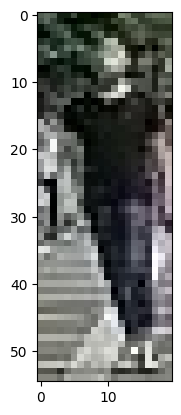

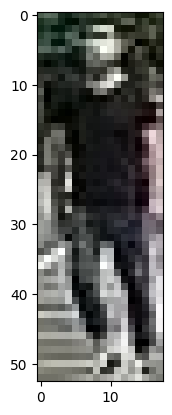

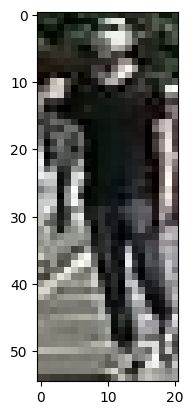

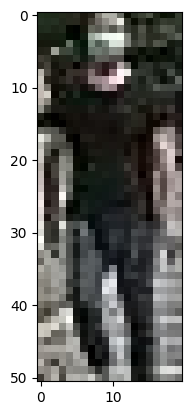

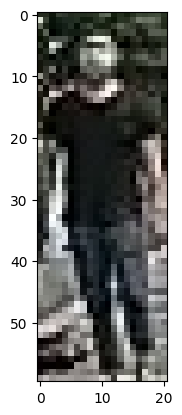

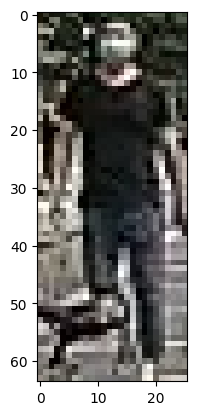

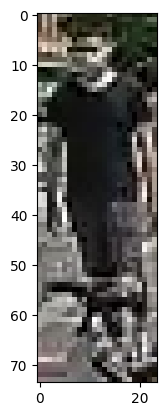

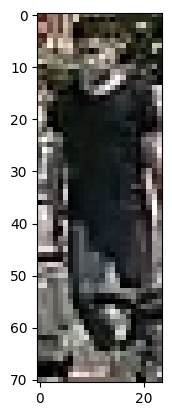

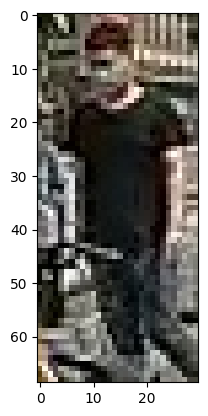

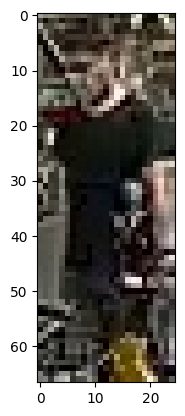

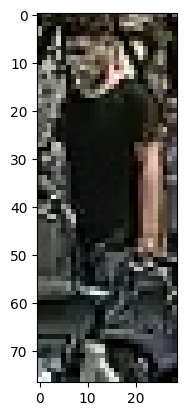

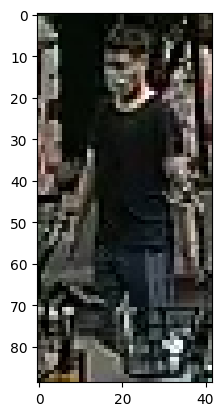

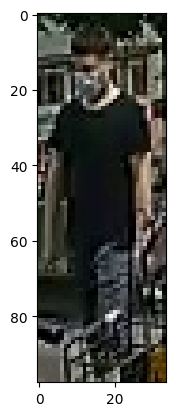

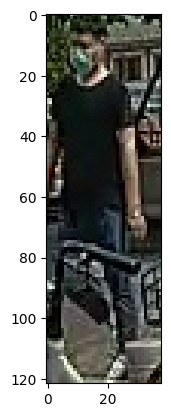

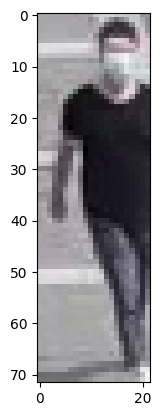

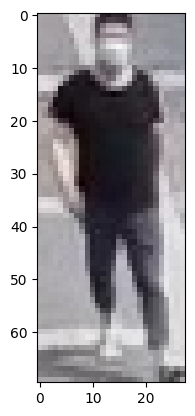

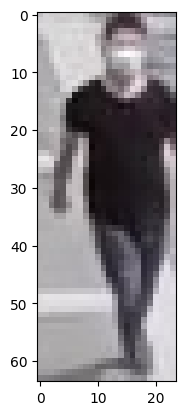

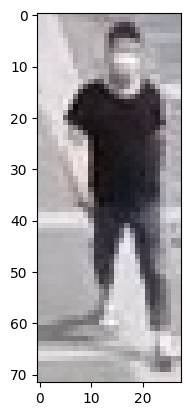

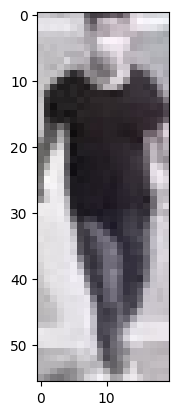

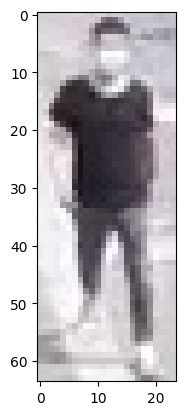

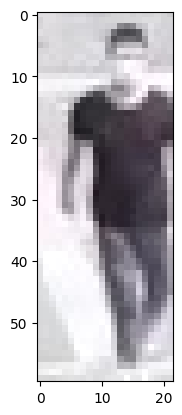

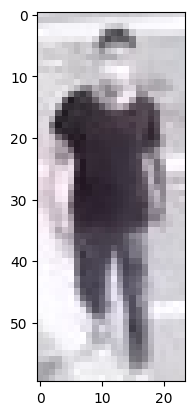

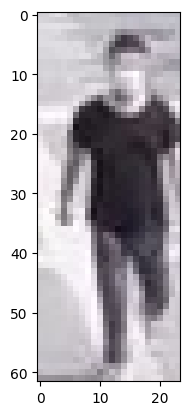

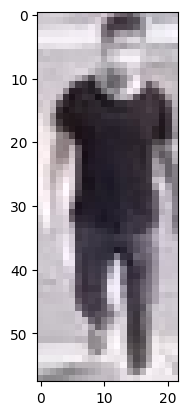

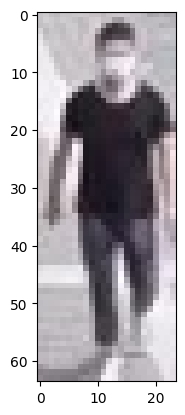

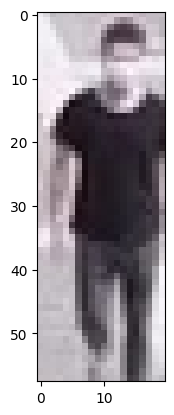

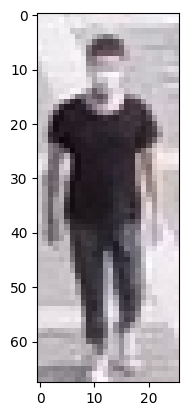

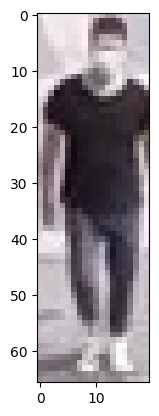

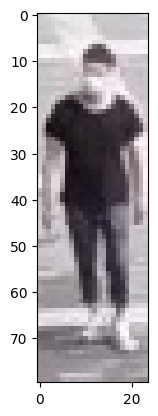

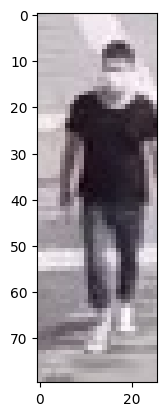

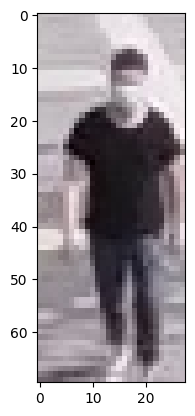

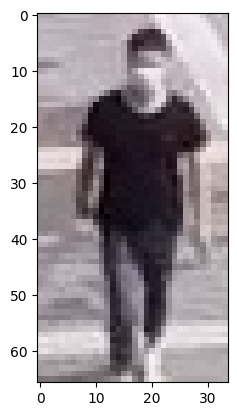

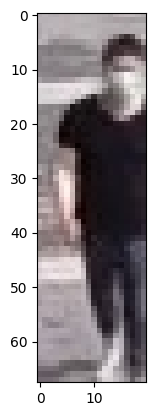

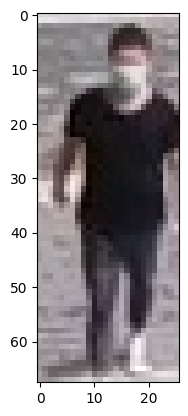

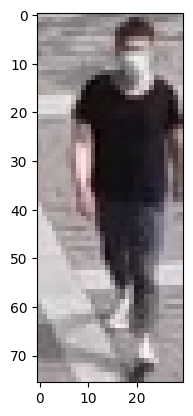

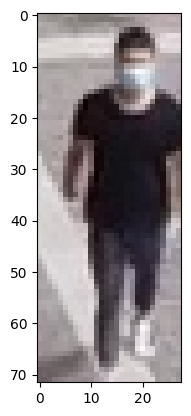

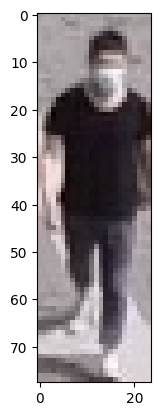

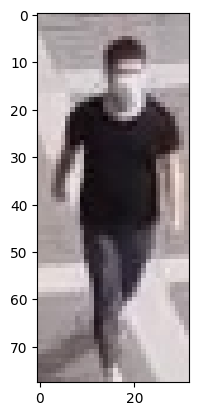

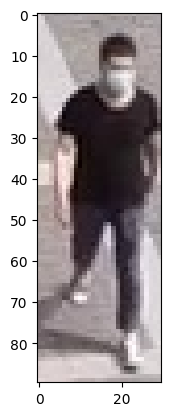

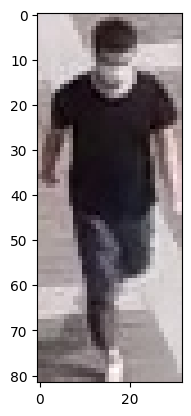

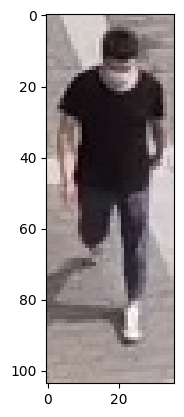

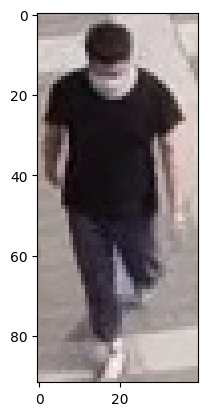

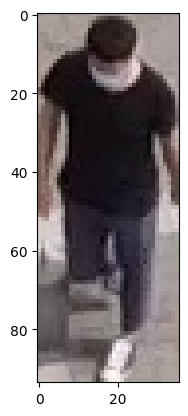

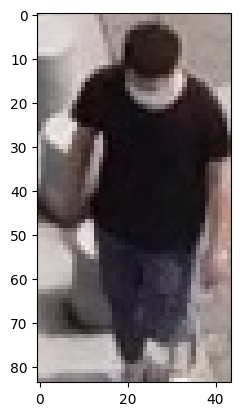

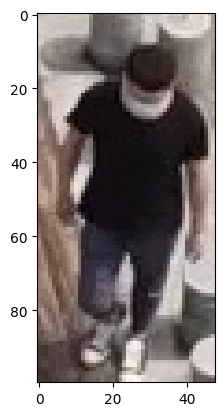

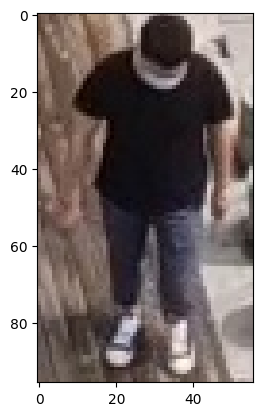

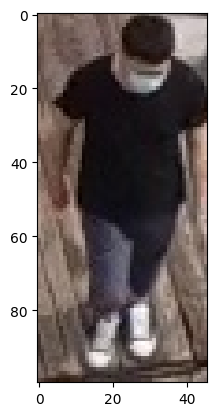

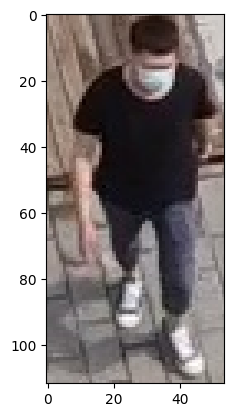

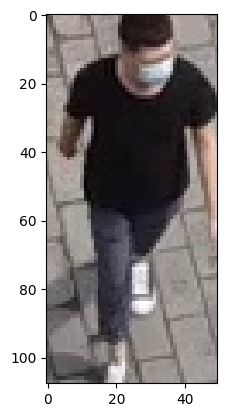

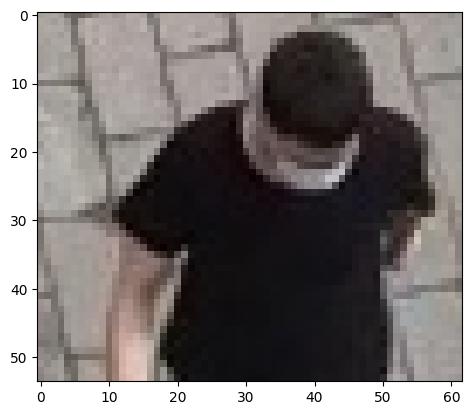

In [12]:
plot_a_person(train_data['Train'][1][0])

In [13]:
id=324

In [14]:
img_data['Img']['imname'][id]

'D1_20_000600.jpg'

In [15]:
img_data['Img']['nAppear'][id]

6

In [16]:
img_data['Img']['box'][id]['idlocate'][0][2:]

[24, 64]

In [17]:
img = Image.open(os.path.join(img_path,img_data['Img']['imname'][id]))

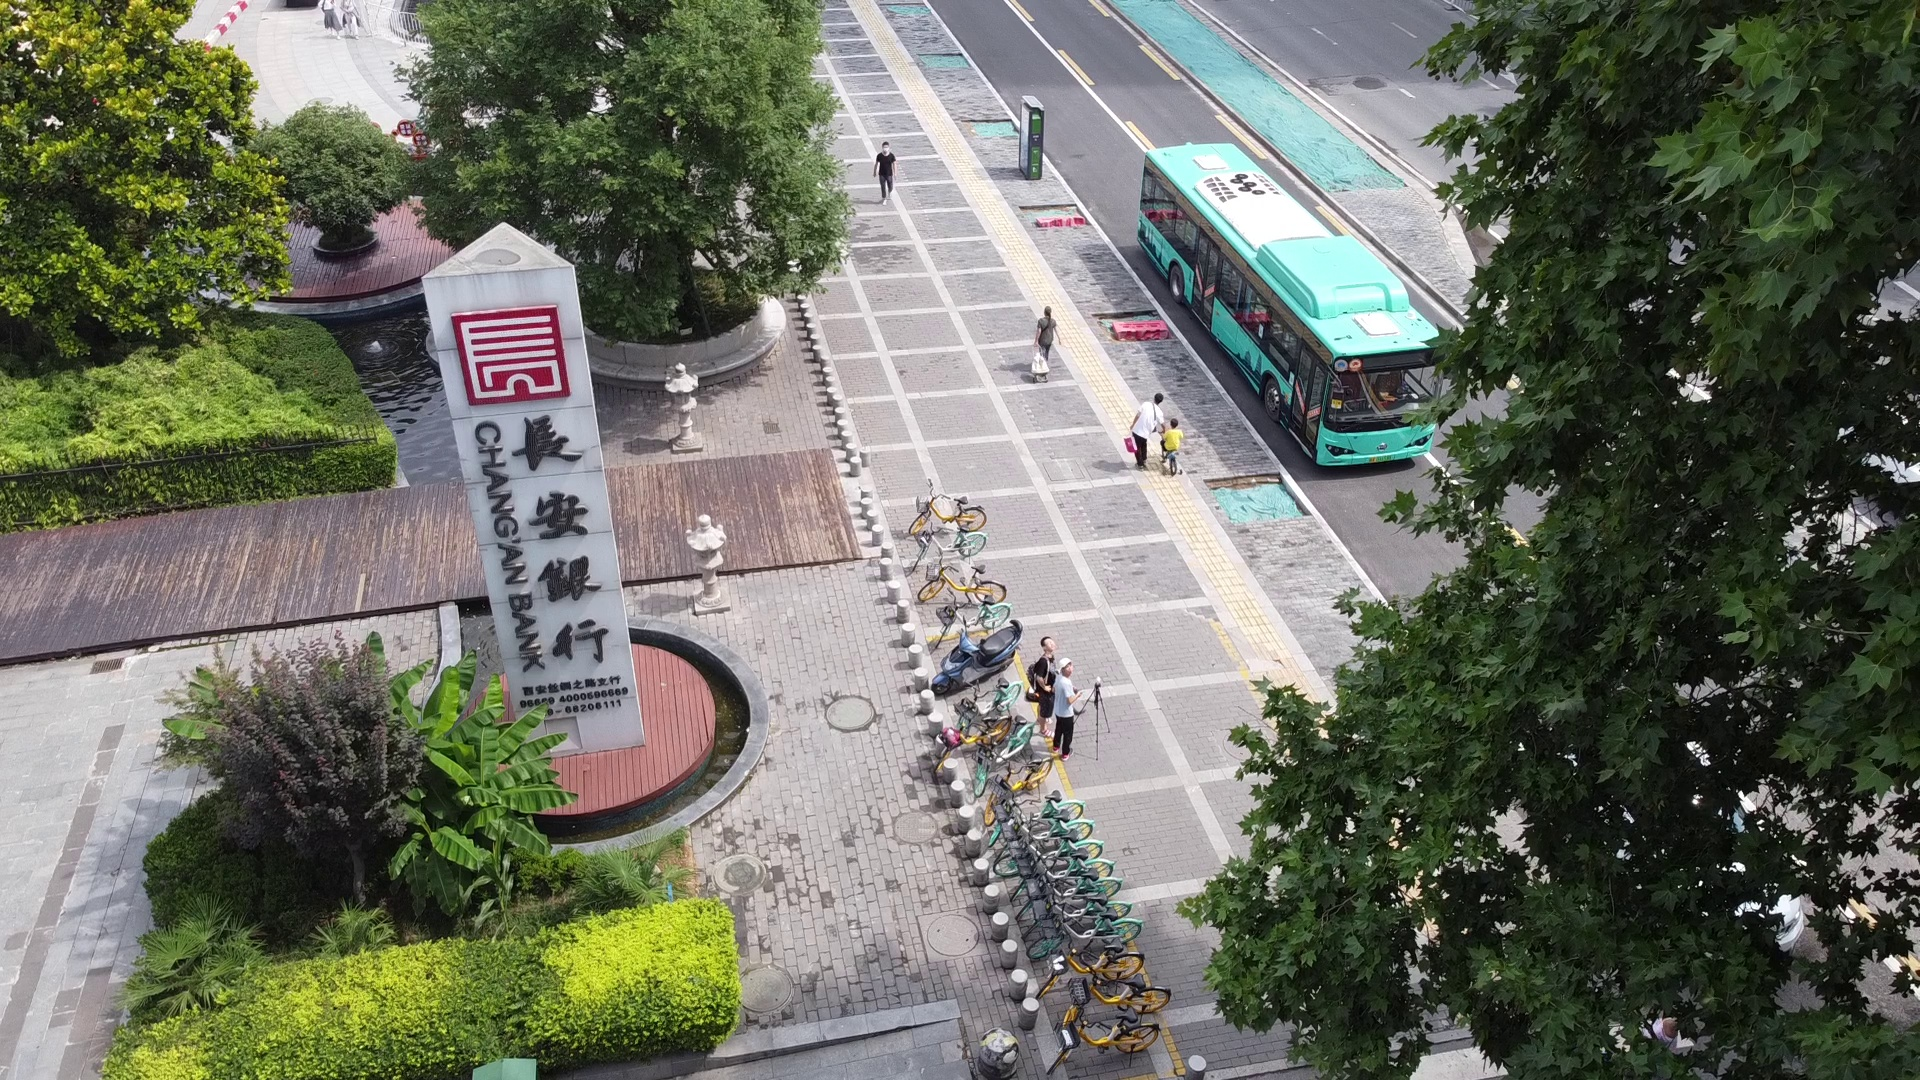

In [18]:
img

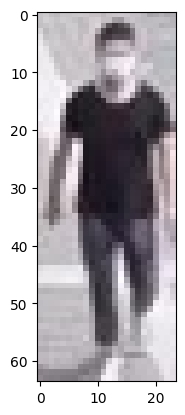

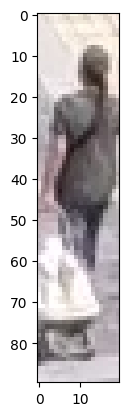

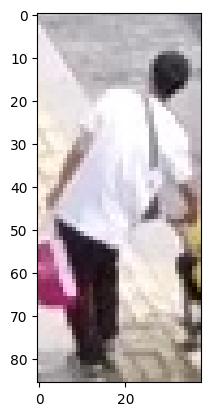

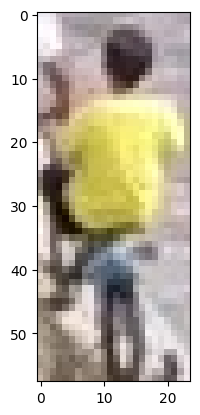

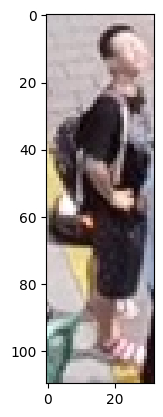

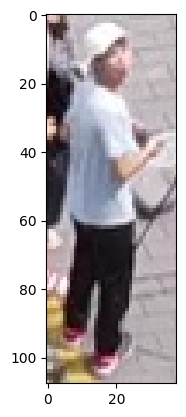

In [19]:
for xywh in img_data['Img']['box'][id]['idlocate']:
    plt.figure()
    resize = False
    img_crop = img.crop(trans_xywh2xyxy(xywh))
    if resize:
        img_crop = img_crop.resize((128,384))
    plt.imshow(img_crop)